<hr style="height: 1px;">
<i>This code was authored by Alex Shvonski, Copyright 2020 MIT All Rights Reserved.</i>
<hr style="height: 1px;">

<h2>Initializing the program</h2>

<font size="3">To initialize the visualization, you may need to click "Run all initialization cells" above (see button location in figure).</font>

<img src="img/binder_initialize_button.png" alt="Drawing" style="width: 700px;" align="left"/>

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<font size="3">You should see the visualization <i>directly below this line</i>, before the next section.</font>

<br/>
<br/>
<hr style="height: 1px;">

In [1]:
%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [2]:
#Define functions 1
###############################################
###############################################
def func1(k,v,alpha):
    #v=1.
    #alpha=0.005
    result = v*k*np.sqrt(1 + 0.1*alpha*k**2.)
    return result


In [3]:
#Define functions 2
###############################################
###############################################
def vp(func,k,v,alpha):
    #phase velocity
    result = func(k,v,alpha)/k
    return result

def vg(func,k,v,alpha):
    #group velocity
    dk = 0.001
    result = (func(k+dk,v,alpha)-func(k-dk,v,alpha))/(2.*dk)
    return result

def func_line(func,k,k0,v,alpha):
    dk = 0.001
    slope = (func(k0+dk,v,alpha)-func(k0-dk,v,alpha))/(2.*dk)
    result = func(k0,v,alpha) + slope*(k-k0)
    return result

<IPython.core.display.Javascript object>


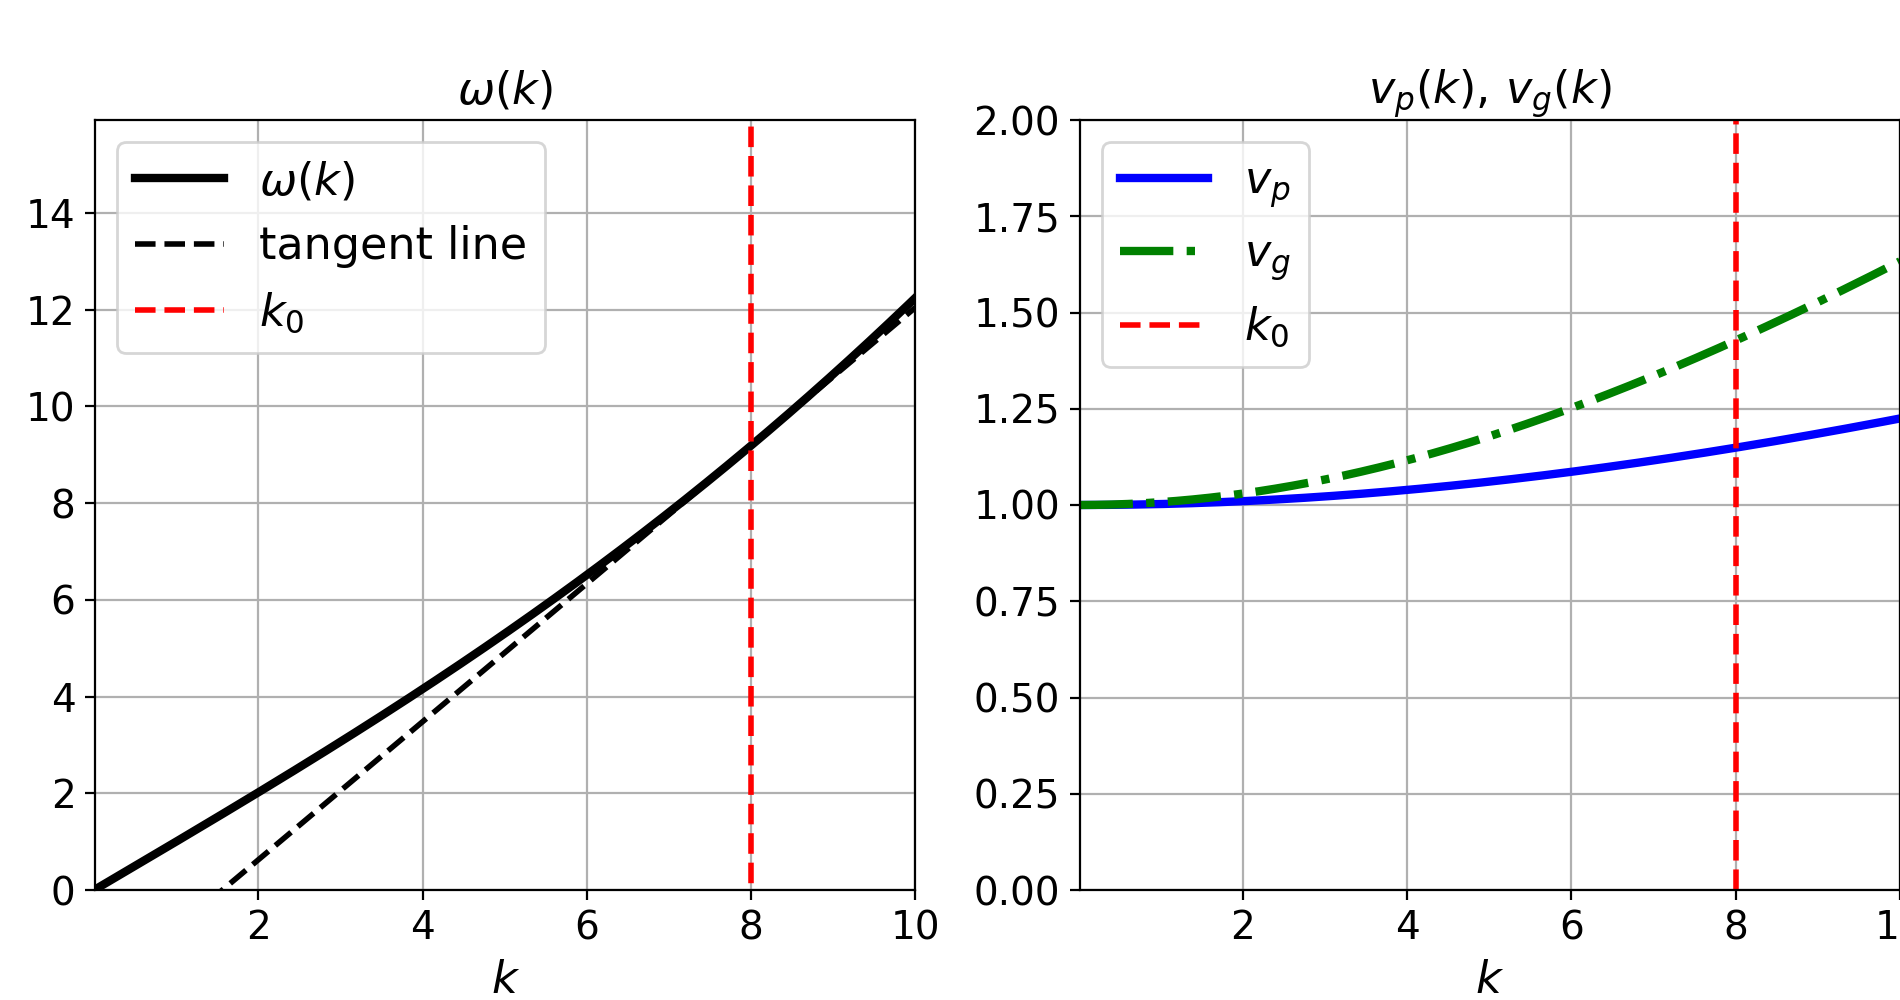

In [4]:
#Define plot
###############################################
###############################################
fig, ax = plt.subplots(1, 2, figsize=(9.5, 5))
plt.subplots_adjust(left=0.05, bottom=None, right=1, top=None, wspace=None, hspace=1.)
k = np.linspace(0.01, 10., 10000)
func=func1
k0=8.
v=1.
alpha=0.05
#############################
#plot1
y_max_1 = max(func(k,v,alpha))*1.3


line_1, = ax[0].plot(k, func(k,v,alpha),
        'k-', lw=3, label='$\omega(k)$')

line_2, = ax[0].plot(k, func_line(func,k,k0,v,alpha),
        'k--', lw=2, label='tangent line')

line_3, = ax[0].plot([k0,k0], [-y_max_1,y_max_1],
        'r--', lw=2, label='$k_0$')


#plot params
ax[0].set_title('$\omega(k)$', fontsize=16)
ax[0].set_xlabel('$k$', fontsize=16)
ax[0].set_ylim(0.,y_max_1)
ax[0].set_xlim(min(k),max(k))
ax[0].grid(True)
ax[0].legend(loc=2, fontsize=16)
plt.setp(ax[0].get_xticklabels(), fontsize=14)
plt.setp(ax[0].get_yticklabels(), fontsize=14)


#############################
#plot2
#y_max_2 = np.max([vp(func,k),vg(func,k)])*1.3
y_max_2 = 2.
y_min_2 = 0.

line_4, = ax[1].plot(k, vp(func,k,v,alpha),
        'b-', lw=3, label='$v_{p}$')

line_5, = ax[1].plot(k, vg(func,k,v,alpha),
        'g-.', lw=3, label='$v_{g}$')

line_6, = ax[1].plot([k0,k0], [y_min_2,y_max_2],
        'r--', lw=2, label='$k_0$')

#plot params
ax[1].set_title('$v_{p}(k),\, v_{g}(k)$', fontsize=16)
ax[1].set_xlabel('$k$', fontsize=16)
ax[1].set_ylim(y_min_2,y_max_2)
ax[1].set_xlim(min(k),max(k))
ax[1].grid(True)
ax[1].legend(loc=2, fontsize=16)
plt.setp(ax[1].get_xticklabels(), fontsize=14)
plt.setp(ax[1].get_yticklabels(), fontsize=14)


#Define plot updater
###############################################
###############################################
def update(k0,v,alpha):
    #plot1
    #############################
    line_1.set_ydata(func(k,v,alpha))
    
    line_2.set_ydata(func_line(func,k,k0,v,alpha))
    
    line_3.set_xdata([k0,k0])
     
    #plot2
    #############################
    line_4.set_ydata(vp(func,k,v,alpha))
    
    line_5.set_ydata(vg(func,k,v,alpha))
    
    line_6.set_xdata([k0,k0])
    
    fig.canvas.draw_idle()
    return


#Define control elements
###############################################
###############################################
s1=widgets.FloatSlider(
    min=0.1,
    max=10.,
    step=0.1,
    value=8,
    layout=Layout(width='500px'),
    description='$k_{0}$',
    style = {'description_width': 'initial'})

s2=widgets.FloatSlider(
    min=0.,
    max=1.,
    step=0.01,
    value=1.,
    layout=Layout(width='500px'),
    description='$v$',
    style = {'description_width': 'initial'})

s3=widgets.FloatSlider(
    min=-0.1,
    max=0.2,
    step=0.01,
    value=0.05,
    layout=Layout(width='500px'),
    description='alpha',
    style = {'description_width': 'initial'})


#Connect controls to plot
###############################################
###############################################
out = interactive_output(update, {'k0': s1, 'v': s2, 'alpha': s3})


#Set layout
###############################################
###############################################
box_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')


#Display output
###############################################
###############################################
display(VBox([s1,s2,s3],layout=box_layout))

<hr style="height: 1px;">

<h2>About the Visualization</h2>

<font size="3">These plots display the following dispersion relation: $\omega(k)=vk\sqrt{1+\alpha k^2}$
<br/>

</font>


<br/>
<font size="3"><b>Plot 1 (left):</b>
<ul>
    <li>(black solid line) the dispersion $\omega(k)$</li>
    <li>(black dashed line) the tangent of the dispersion curve at the wavenumber $k_{0}$</li>
    <li>(red dashed line) the location of the wavenumber $k_{0}$, where the tangent line is calculated</li>
</ul>
    
<br/>
<b>Plot 2 (right):</b>
<ul>
    <li>(blue line) the phase velocity, $v_{p}$, as a function of $k$</li>
    <li>(green dash-dotted line) the group velocity, $v_{g}$, as a function of $k$</li>
    <li>(red dashed line) the location of the wavenumber $k_{0}$, where the tangent line is calculated</li>
</ul>
    
<br/>
<b>Sliders:</b>
<ul>
    <li>$k_{0}$: vary the wavenumber, where the tangent line is calculated</li>
    <li>$v$: vary the velocity parameter</li>
    <li>$\alpha$: vary the nonlinear dispersion parameter, including negative and positive values</li>
</ul>
</font>

<br/>

<hr style="height: 1px;">

<h2>Exploration</h2>

<font size="3">Consider the following questions and possible actions:
<ul>
    <li>How does the shape of the dispersion curve change as $v$ and $\alpha$ are varied?</li>
    <li>For what values of $\alpha$ is the phase velocity greater than the group velocity (and visa versa)?</li>
    <li>Is there a set of parameters that produces a group or phase velocity equal to zero?</li>
</ul>      
</font>

<br/>

<hr style="height: 1px;">

<h2>Viewing the Code</h2>
<br/>
<font size="3">You are encouraged to click the button below to view the source code. You can alter the code and rerun it within this notebook, or download the notebook itself and run the code locally on your own machine.</font>

In [5]:
#Enable hidden code
###############################################
###############################################
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
